In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import sys
from scipy import ndimage
import colorsys
from skimage.transform import pyramid_gaussian
from annoy import AnnoyIndex

win = "Lenna"

/Users/sudeepagarwal/anaconda3/envs/opencv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sudeepagarwal/anaconda3/envs/opencv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sudeepagarwal/anaconda3/envs/opencv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def pxtoix(p, w):
    return p[0] * w + p[1]
    

In [3]:
def ixtopx(i, w):
    return (int(i / w), i % w)
    

In [4]:
def trf(img):
    if(len(img.shape)) == 2:
#         print("Yeah")
        return img
    return img[..., ::-1]


In [5]:
def show(images, cols):
    n = len(images)
    r = int(n / cols)
    if (n % cols) != 0:
        r += 1 
    c = cols
    fig, axs = plt.subplots(nrows=r, ncols=c, figsize=(50, 30),
                            subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.05)
    
    for i in range(len(images)):
        if(len(images[i].shape) == 2):
            (axs.flat)[i].imshow(trf(images[i]), cmap='gray')
        else:
            (axs.flat)[i].imshow(trf(images[i]))


In [6]:
def pyramids(img, l):
    gp = list(pyramid_gaussian(img, max_layer=l))
    gp.reverse() 
    WHITE = [1.0, 1.0, 1.0]
    for i in range(l + 1):
        gp[i] = cv2.copyMakeBorder(gp[i],pad,pad,pad,pad,cv2.BORDER_REFLECT)

    return gp


In [7]:
def rgbtoyiq(img):
    img = img.astype('float64')
    s = img.shape
    img1 = np.zeros(s, dtype='float64')
    for i in range(s[0]):
        for j in range(s[1]):
            x = img[i][j] / 255.0
            y1, y2, y3 = colorsys.rgb_to_yiq(x[0], x[1], x[2])
            img1[i][j] = [y1, y2, y3]
    return img1.astype('float64')

In [8]:
def yiqtorgb(img):
    s = img.shape
    img1 = np.zeros(s, dtype='float64')
    for i in range(s[0]):
        for j in range(s[1]):
            x = img[i][j]
            y1, y2, y3 = colorsys.yiq_to_rgb(x[0], x[1], x[2])
            img1[i][j] = [y1, y2, y3]
    img1 = img1 * 255.0
    return img1.astype('uint16')

In [9]:
def remap(a, ap, b):
    a1 = np.array(a)
    ap1 = np.array(ap)
    a0 = np.array(a[:, :, 0])
    b0 =np.array(b[:, :, 0])
    am = np.mean(a0)
    astd = np.std(a0)
    bm = np.mean(b0)
    bstd = np.std(b0)
    print(am, bm, astd, bstd)
    s = a.shape
    for i in range(s[0]):
        for j in range(s[1]):
            a1[i][j][0] = (float(bstd/astd) * ( a[i][j][0] - am)) + bm
            ap1[i][j][0] = (float(bstd/astd) * ( ap[i][j][0] - am)) + bm
    return a1, ap1
    

In [13]:
A_PATH = 'images/arch-A.jpg'
AP_PATH = 'images/arch-Ap.jpg'
B_PATH = 'images/arch-B.jpg'
a = cv2.imread(A_PATH)
ap = cv2.imread(AP_PATH)
b = cv2.imread(B_PATH)


a1 = rgbtoyiq(a)
ap1 = rgbtoyiq(ap)
b1 = rgbtoyiq(b)
a2, ap2 = remap(a1, ap1, b1)



0.2992300359158815 0.23444428900348016 0.20175094318136758 0.18265560301601413


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


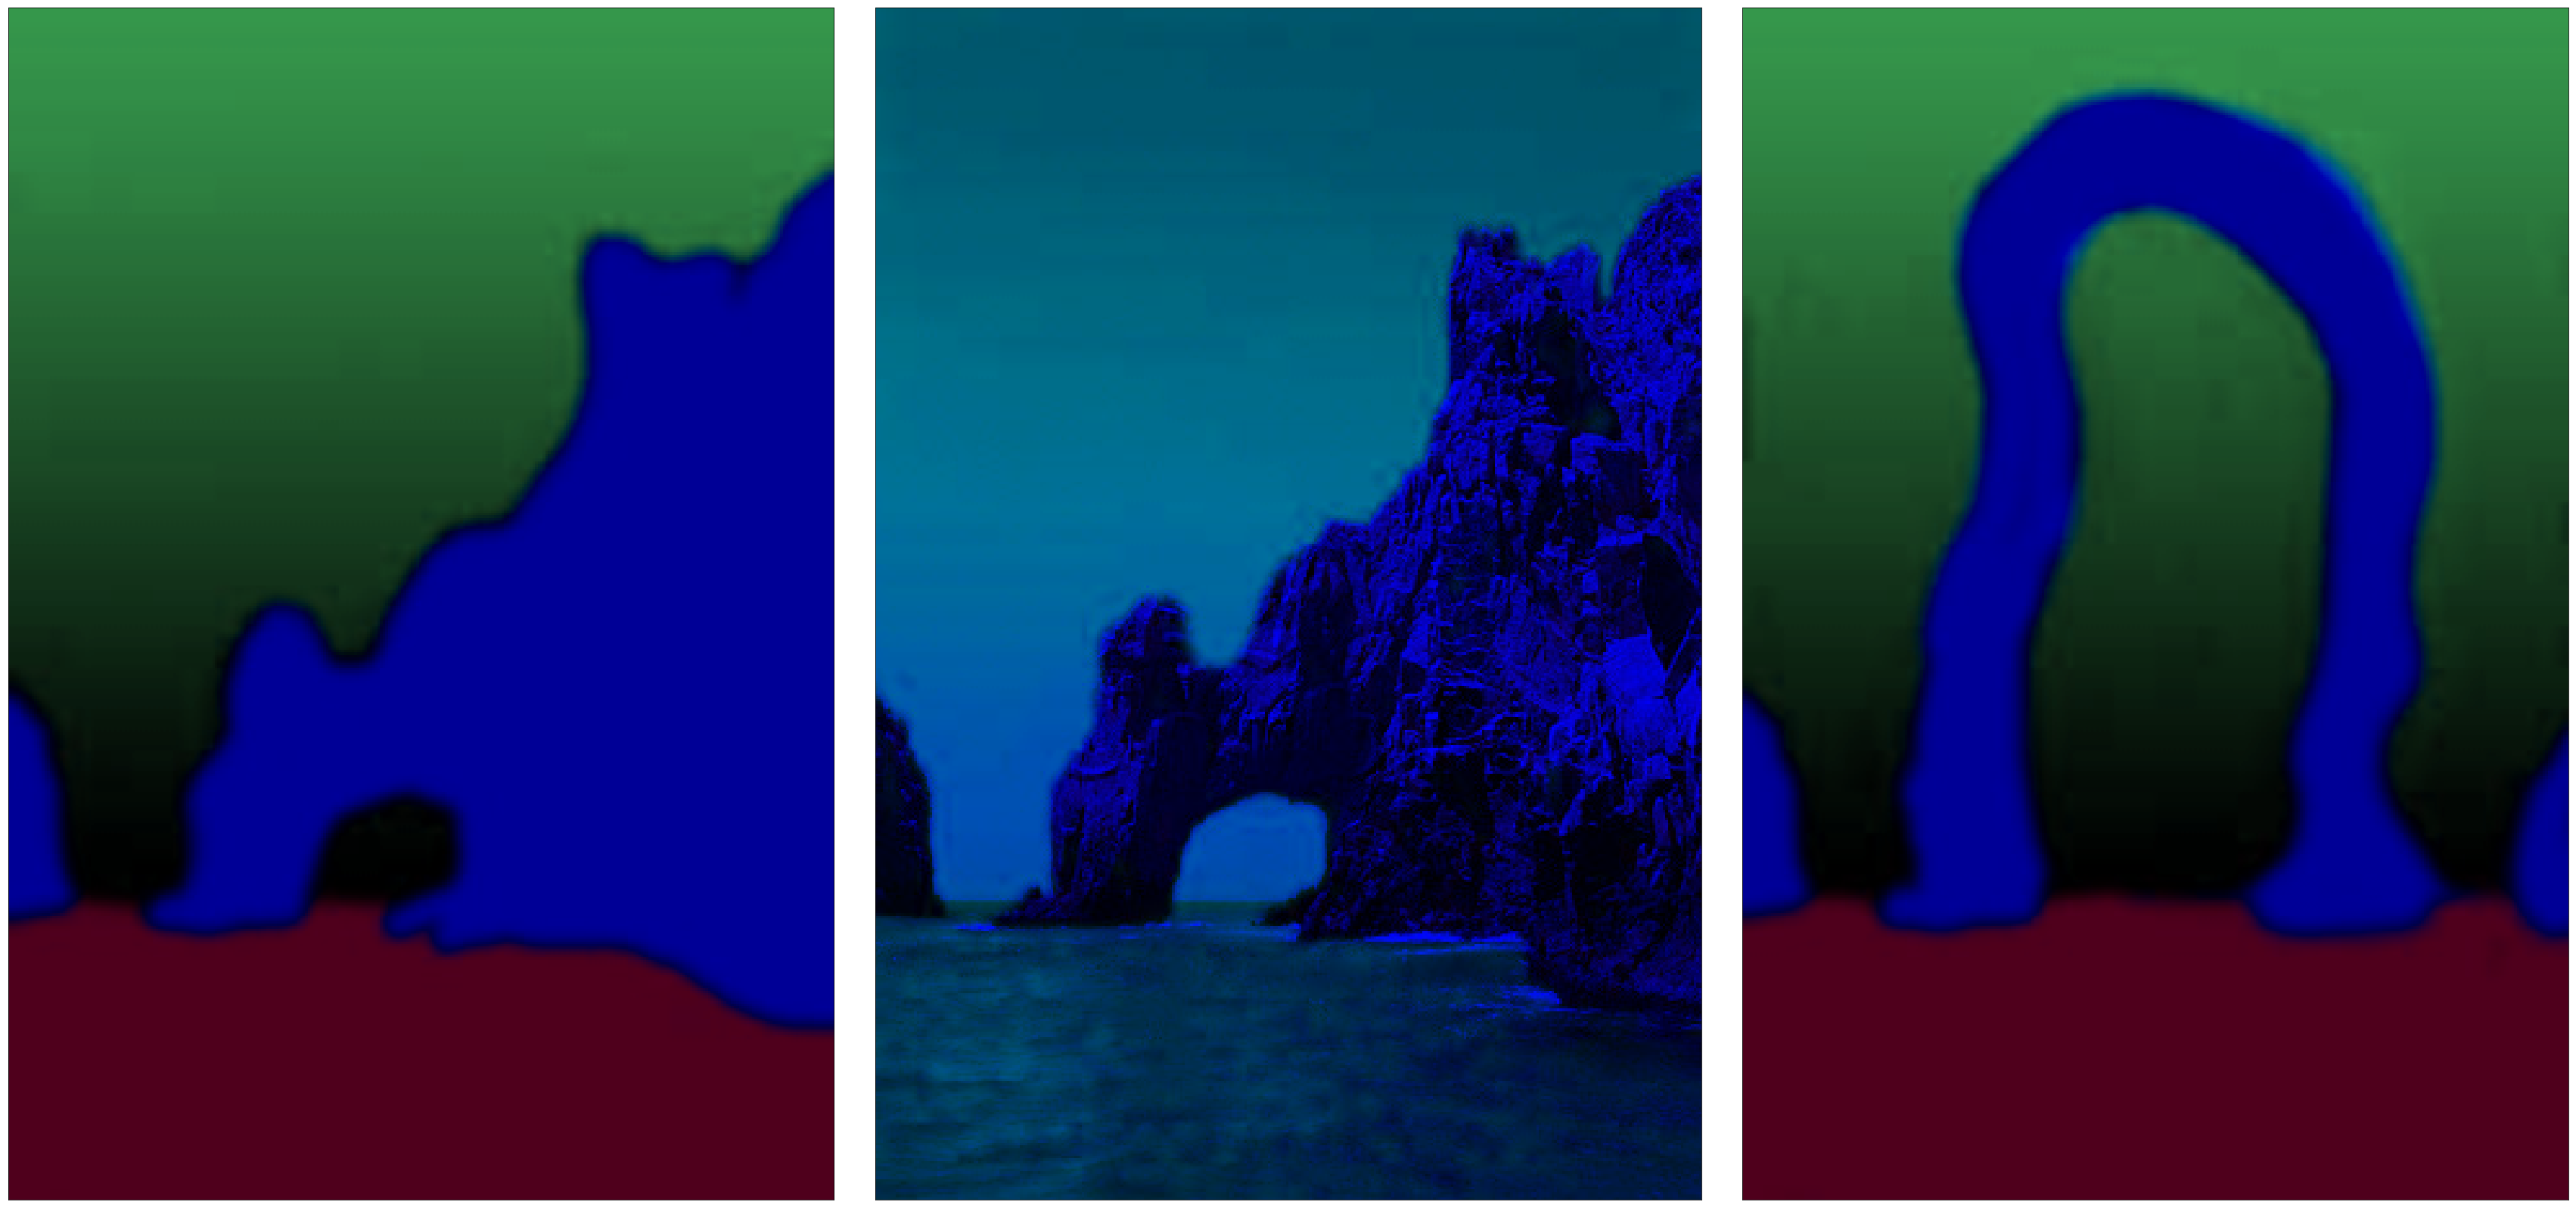

In [14]:
show([a1, ap1, b1], 3)

In [15]:
l = 4
pad = 2
pad_f = 1
# a2 = cv2.copyMakeBorder(a1,pad,pad,pad,pad,cv2.BORDER_CONSTANT, value=WHITE)
# ap2 = cv2.copyMakeBorder(ap1,pad,pad,pad,pad,cv2.BORDER_CONSTANT, value=WHITE)
# b2 = cv2.copyMakeBorder(b1,pad,pad,pad,pad,cv2.BORDER_CONSTANT, value=WHITE)

In [16]:
g_a = pyramids(a2, l)
g_ap = pyramids(ap2, l)
g_b = pyramids(b1, l)
g_bp = pyramids(b1, l)


/Users/sudeepagarwal/anaconda3/envs/opencv/lib/python3.5/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


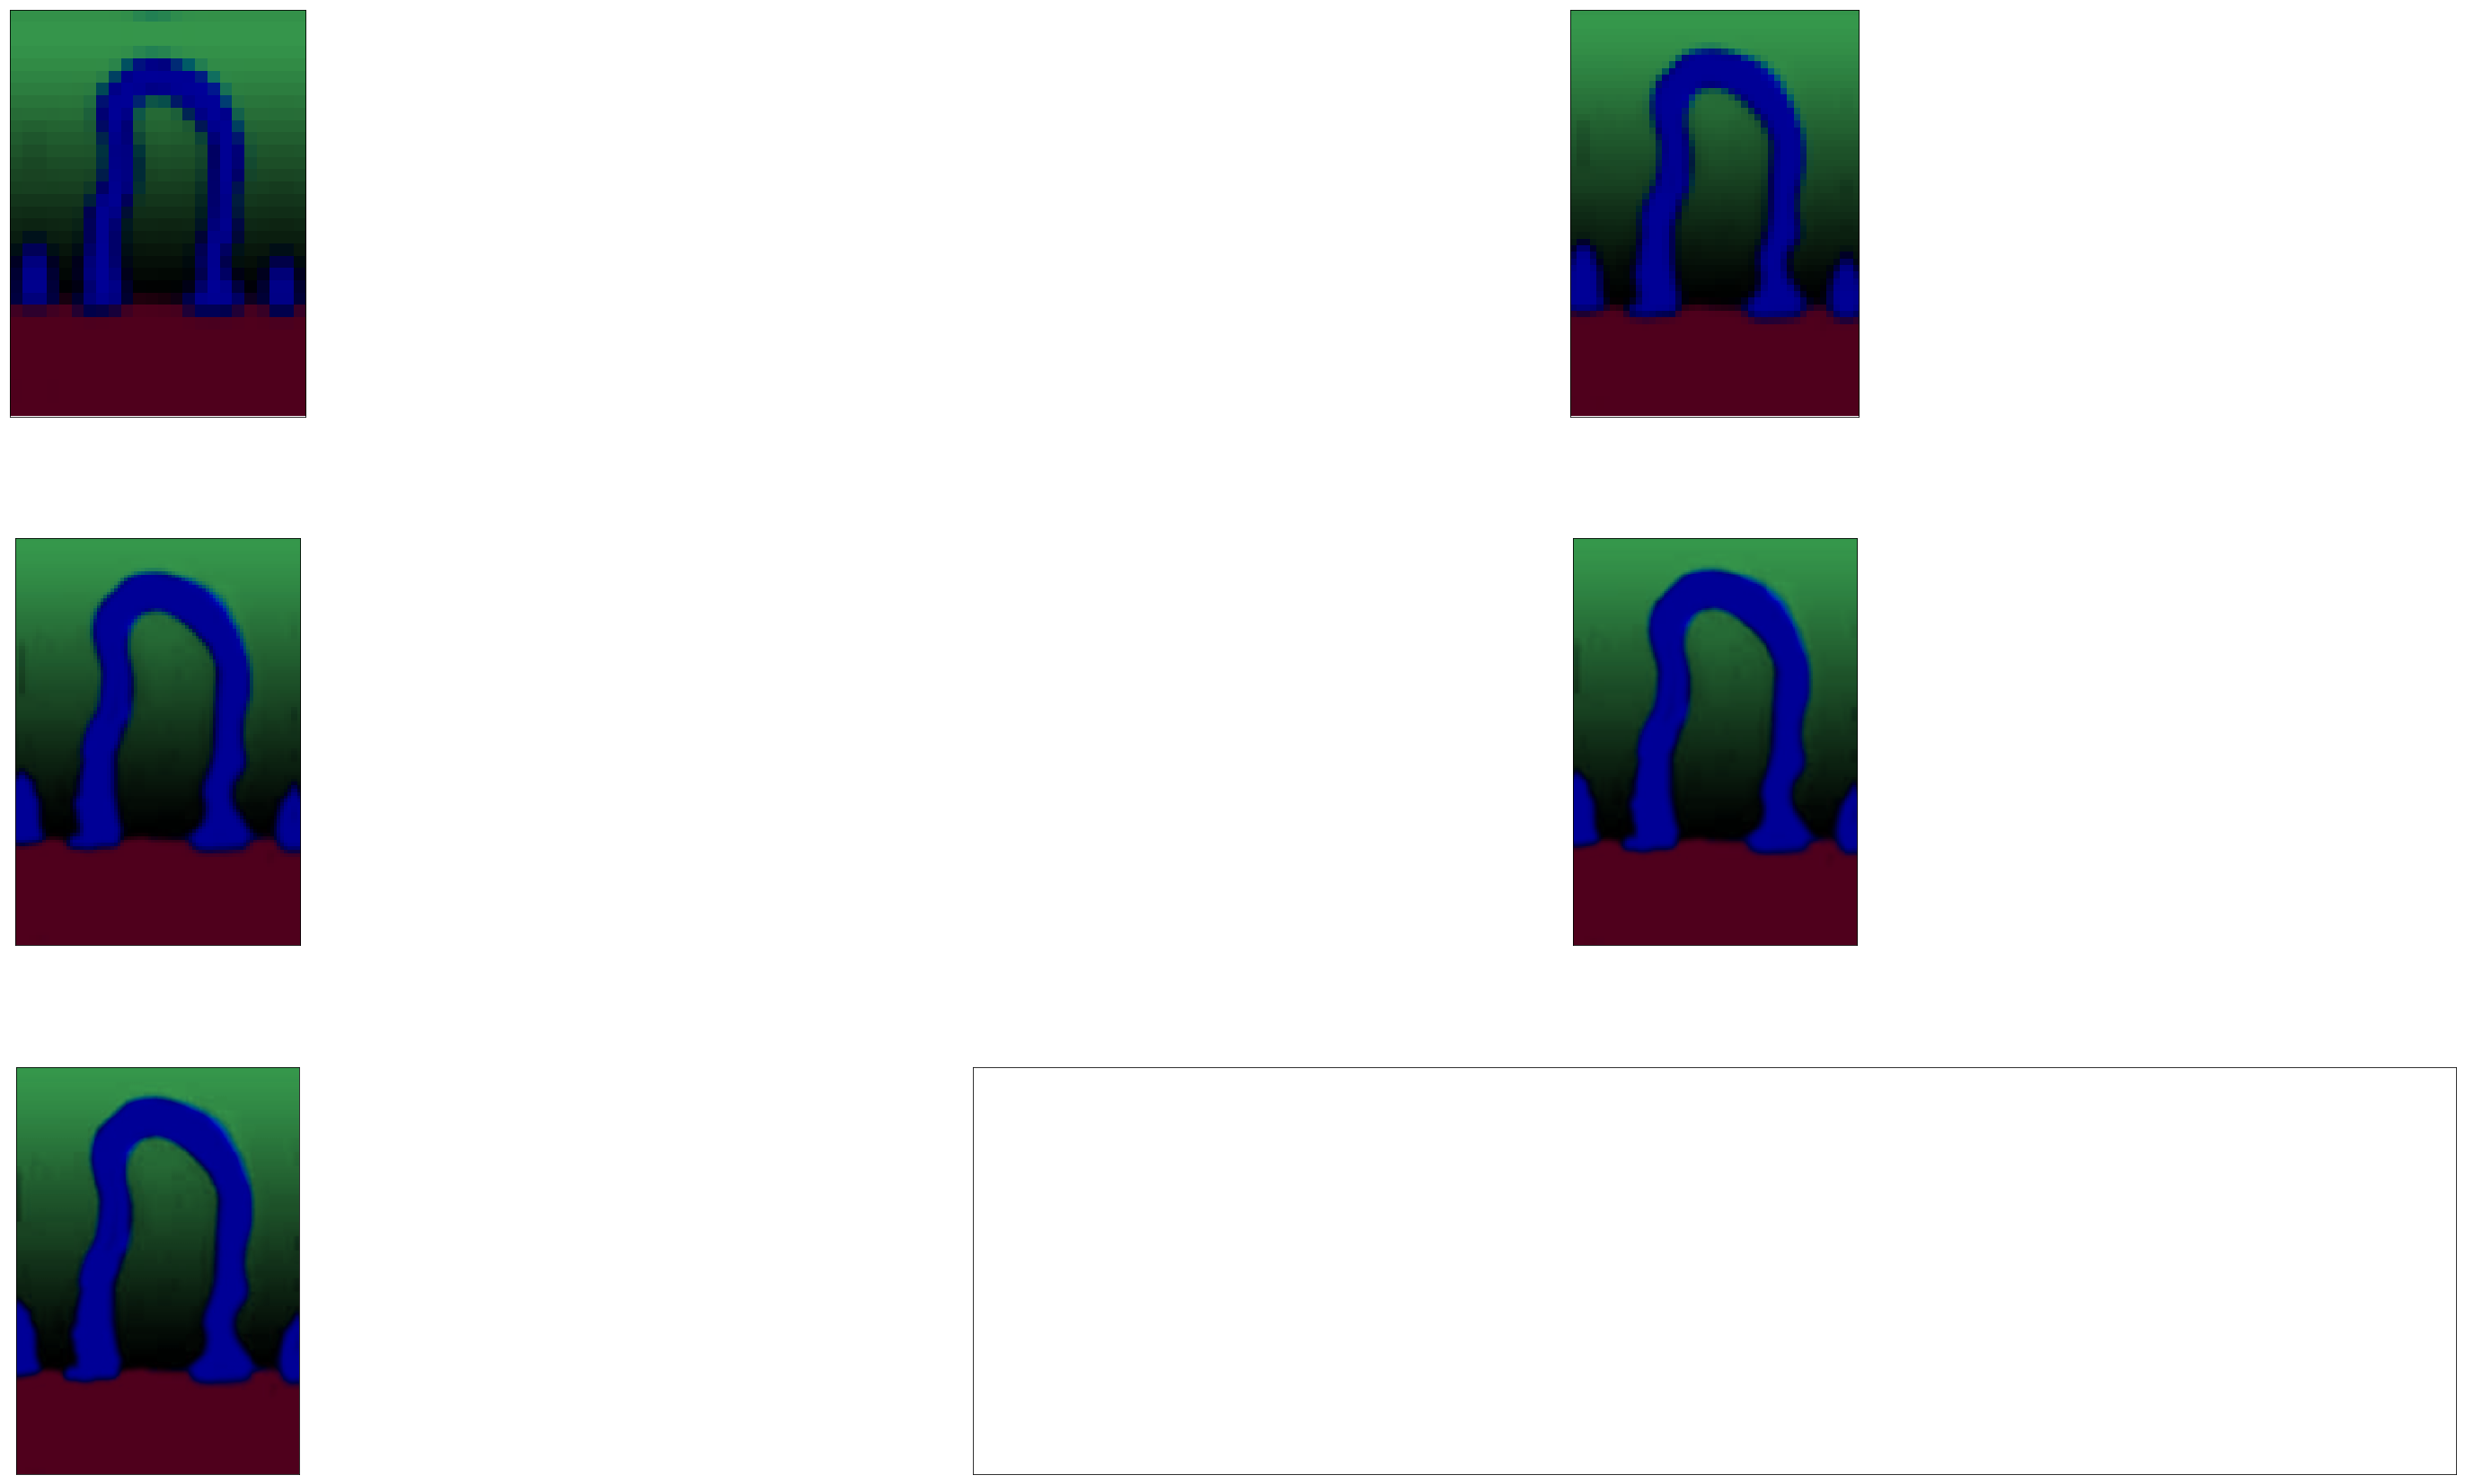

In [17]:
show(g_b, 2)

In [18]:
def transform(g_a, g_ap, lev, i, j):
    s = g_a[lev].shape
    s = (s[0] - 2 * pad, s[1] - 2* pad)
    fv = []
    if(lev != 0):
        for x in range(-pad_f, pad_f + 1):
            for y in range(-pad_f, pad_f + 1):
                fv = np.append(fv, g_a[lev - 1][int(i / 2) + pad_f + x][int(j / 2) + pad_f + y])
                

    for x in range(-pad, pad + 1):
        for y in range(-pad, pad + 1):
            fv = np.append(fv, g_a[lev][i + pad + x][j + pad + y])

    if(lev != 0):
        for x in range(-pad_f, pad_f + 1):
            for y in range(-pad_f, pad_f + 1):
                fv = np.append(fv, g_ap[lev - 1][int(i / 2) + pad_f + x][int(j / 2) + pad_f + y])

    for x in range(-pad, 0):
        for y in range(-pad, pad + 1):
            fv = np.append(fv, g_ap[lev][i + pad + x][j + pad + y])
    for y in range(-pad, 0):
        fv = np.append(fv, g_ap[lev][i + pad][j + pad + y])

            
    return fv
    
    

In [19]:
def transform_image(g_a, g_ap, level):
    s = g_a[level].shape
    s = (s[0] - 2 * pad, s[1] - 2 * pad)
    if(level == 0):
        f = 111
    else:
        f = 165
    t = AnnoyIndex(f, metric='euclidean')
    img = np.zeros((s[0], s[1], f))
    k = 0
    for i in range(s[0]):
        for j in range(s[1]):
            img[i][j] = transform(g_a, g_ap, level, i, j)
            t.add_item(k, img[i][j])
            k += 1
    t.build(20)
    return img, t
    

In [20]:
def neighbours(i, j, s):
    temp = []
    for x in range(-pad, 0):
        for y in range(-pad, pad + 1):
            if(i + x >= 0 and j + y >= 0 and j + y < s[1] and i + x < s[0]):
                temp.append((x, y))
    for y in range(-pad, 0):
        if(j + y >= 0):
            temp.append((0, y))
    return temp

In [21]:
def best_coherent(mp, lev, i, j, a_f, vb, s):
    N = neighbours(i, j, s)
    sa = a_f.shape
    mn = float(sys.maxsize)
    ind = (-1, -1)
#     print(N)
    for n in N:
        (pi, pj) = mp[(i + n[0], j + n[1])]
#         print(i, j, pi, pj)

        (pi, pj) = ((pi - n[0]), (pj - n[1]))
#         print(i, j, pi, pj)

        if(pi < 0 or pi >= sa[0] or pj < 0 or pj >= sa[1] ):
            continue
        
        vq = a_f[(pi, pj)]
        vv = vq - vb
        val = np.sum(np.square(vv))
        if(val < mn):
            mn = val
            ind = (pi, pj)
    return ind


In [22]:
mp = []
k_coh = 2.0
for lev in range(l + 1): 
    a_f, t = transform_image(g_a, g_ap, lev)
    sb = g_b[lev].shape
    sb = (sb[0] - 2 * pad, sb[1] - 2 * pad)
    temp = {}
    k = 0
    kc = 0
    print(lev, sb, a_f.shape)
    
    for i in range(sb[0]):
#         print(i)
        for j in range(sb[1]):
            
            vb = transform(g_b, g_bp, lev, i, j)
            p_ann = t.get_nns_by_vector(vb, 1)[0]
            p_ann = ixtopx(p_ann, a_f.shape[1])    
#             print(temp)
            p_coh = best_coherent(temp, lev, i, j, a_f, vb, sb)
#             print(i, j, a_f[p_ann].shape, vb.shape)
            if(p_coh == (-1, -1)):
                temp[(i, j)] = p_ann
                g_bp[lev][i + pad][j + pad] = g_ap[lev][temp[i, j]]
                k += 1
                continue
            d_ann = float(np.sum(np.square((a_f[p_ann] - vb))))
            d_coh = float(np.sum(np.square((a_f[p_coh] - vb))))
            if(d_coh <= d_ann * (1.0 + float(pow(2, lev - l)) * k_coh)):
                kc += 1
                temp[(i, j)] = p_coh
            else:
                temp[(i, j)] = p_ann
            g_bp[lev][i + pad][j + pad] = g_ap[lev][temp[i, j]]
            k += 1
    print(k, kc)
    mp.append(temp)
            
        
        
    

0 (29, 20) (29, 20, 111)
580 443
1 (58, 40) (58, 40, 165)
2320 2123
2 (116, 80) (116, 80, 165)
9280 8953
3 (231, 160) (231, 160, 165)
36960 36387
4 (462, 320) (462, 320, 165)
147840 146931


In [24]:
bp_rgb = []
for i in g_bp:
    bp_rgb.append(yiqtorgb(i))


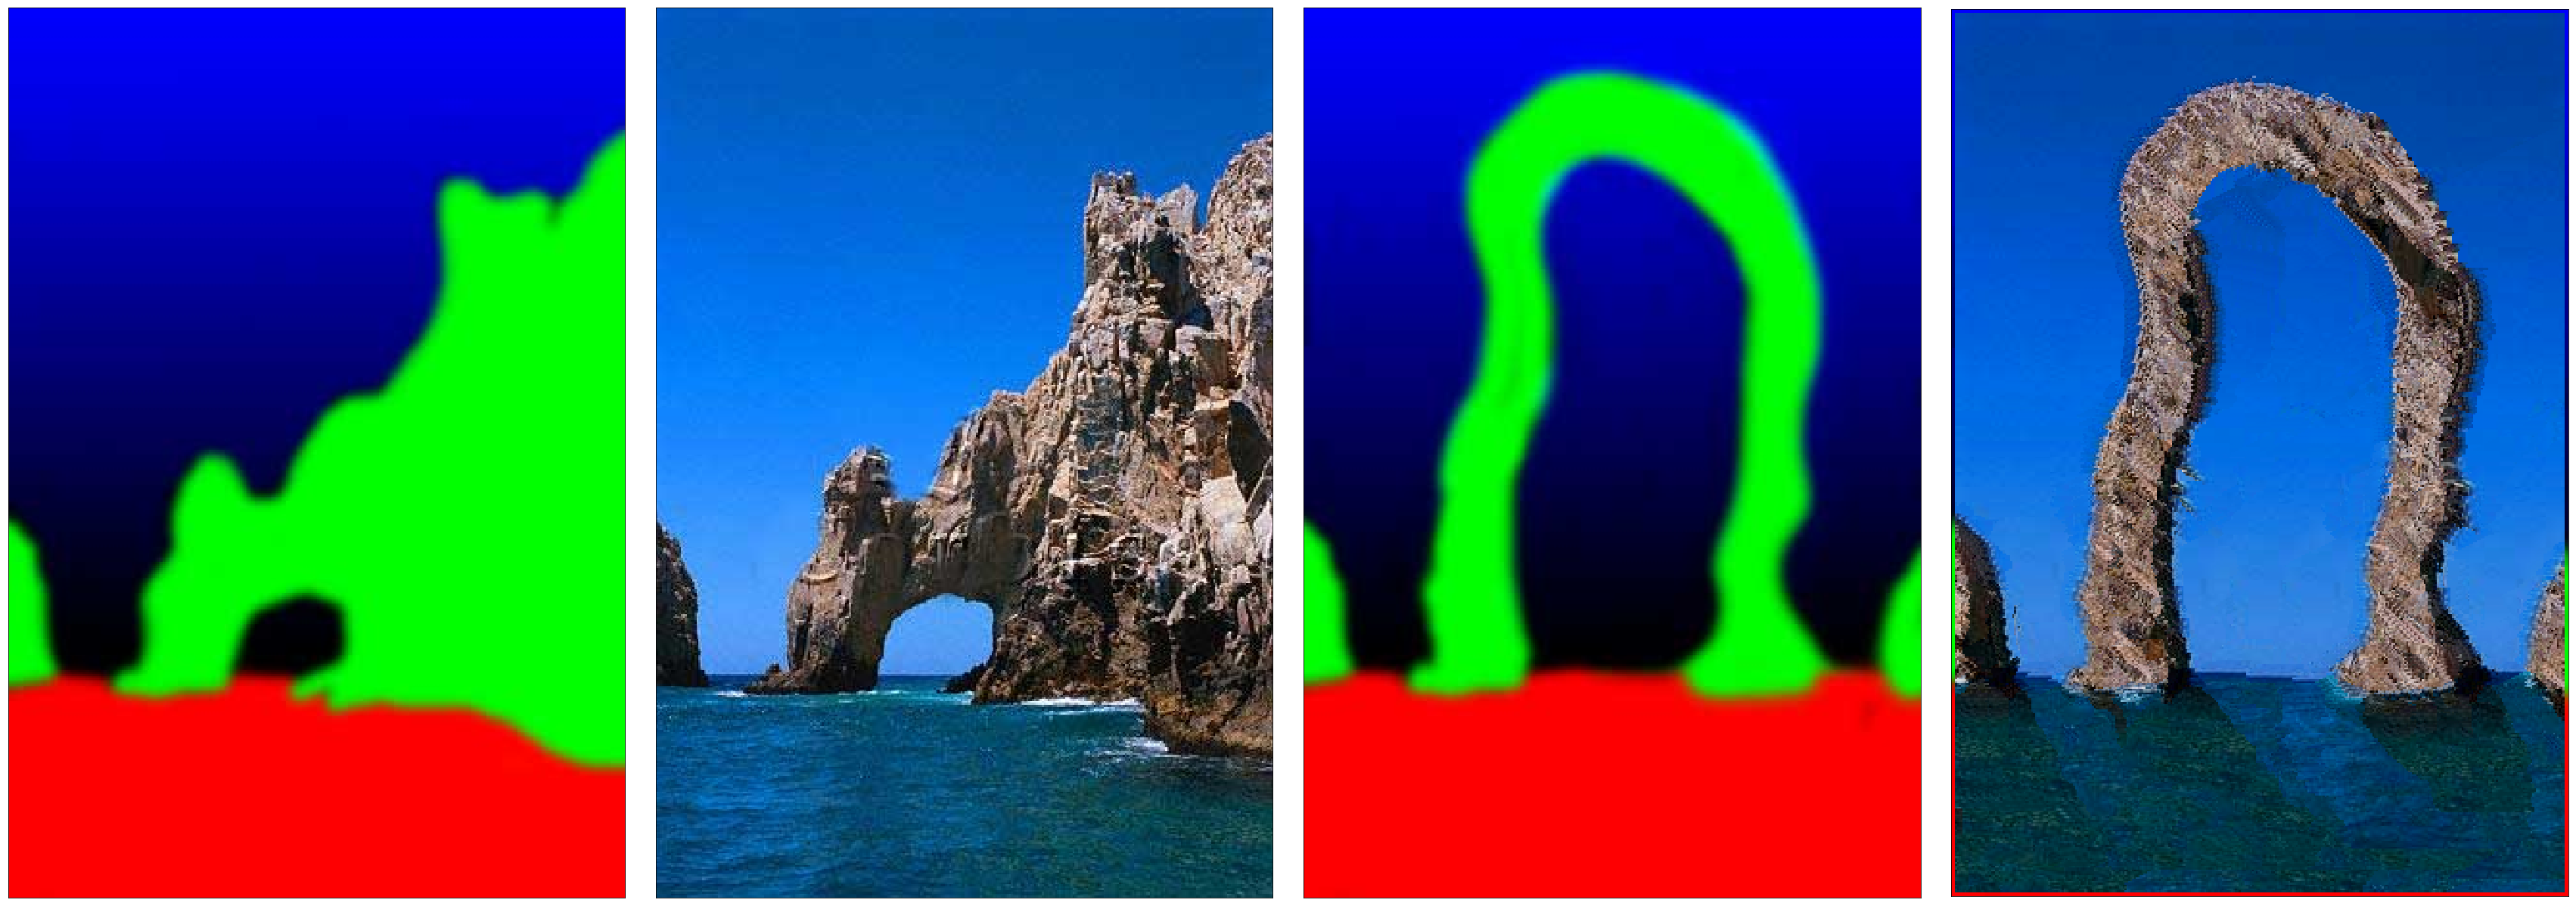

In [25]:
show([a, ap, b, bp_rgb[l]], 4)

In [27]:
cv2.imwrite('images/arch-Bp.jpg', bp_rgb[l])

True